# `Shift Cipher`
----

### `imports`

In [1]:
import numpy as np
from util import ALPHA_IMAP, R_ALPHA_IMAP

### `Ciphertext`

In [2]:
cipher = 'SDSCLODDOBDYMBOKDODRKXDYVOKBXMBOKDSXQSCDROOCCOXMOYPVSPO'

### `Cryptoanalysis`

There are only 26 possible shifts. 

Simply through a *brute force* tactic of cycling through every N from 1-26, the plaintext can be deciphered.

In [3]:
plaintext = ''
# iterating through 1-26
# printing each text so the plantext can be discovered
for i in range(1, len(ALPHA_IMAP) + 1):
    for c in cipher:
        shift = (ALPHA_IMAP[c] - i) % 26
        plaintext += R_ALPHA_IMAP[shift]

    print(f'{i}. {plaintext}')
    plaintext = ''

1. RCRBKNCCNACXLANJCNCQJWCXUNJAWLANJCRWPRBCQNNBBNWLNXOURON
2. QBQAJMBBMZBWKZMIBMBPIVBWTMIZVKZMIBQVOQABPMMAAMVKMWNTQNM
3. PAPZILAALYAVJYLHALAOHUAVSLHYUJYLHAPUNPZAOLLZZLUJLVMSPML
4. OZOYHKZZKXZUIXKGZKZNGTZURKGXTIXKGZOTMOYZNKKYYKTIKULROLK
5. NYNXGJYYJWYTHWJFYJYMFSYTQJFWSHWJFYNSLNXYMJJXXJSHJTKQNKJ
6. MXMWFIXXIVXSGVIEXIXLERXSPIEVRGVIEXMRKMWXLIIWWIRGISJPMJI
7. LWLVEHWWHUWRFUHDWHWKDQWROHDUQFUHDWLQJLVWKHHVVHQFHRIOLIH
8. KVKUDGVVGTVQETGCVGVJCPVQNGCTPETGCVKPIKUVJGGUUGPEGQHNKHG
9. JUJTCFUUFSUPDSFBUFUIBOUPMFBSODSFBUJOHJTUIFFTTFODFPGMJGF
10. ITISBETTERTOCREATETHANTOLEARNCREATINGISTHEESSENCEOFLIFE
11. HSHRADSSDQSNBQDZSDSGZMSNKDZQMBQDZSHMFHRSGDDRRDMBDNEKHED
12. GRGQZCRRCPRMAPCYRCRFYLRMJCYPLAPCYRGLEGQRFCCQQCLACMDJGDC
13. FQFPYBQQBOQLZOBXQBQEXKQLIBXOKZOBXQFKDFPQEBBPPBKZBLCIFCB
14. EPEOXAPPANPKYNAWPAPDWJPKHAWNJYNAWPEJCEOPDAAOOAJYAKBHEBA
15. DODNWZOOZMOJXMZVOZOCVIOJGZVMIXMZVODIBDNOCZZNNZIXZJAGDAZ
16. CNCMVYNNYLNIWLYUNYNBUHNIFYULHWLYUNCHACMNBYYMMYHWYIZFCZY
17. BMBLUXMMXKMHVKXTMXMATGMHEXTKGVKXTMBGZBLMAXXLL

#### `Plaintext`

Line #10

It was fairly painless to decipher the plaintext after printing all possible shift arrangements.

<font color = "gold"><strong>

"It is better to create than to learn. Creating is the essence of life"

</font></strong>

# `Substitution Cipher`
-------

### `Imports`

In [4]:
from util import _frequency, _ngram_to_M, _topk, _canvas, _ngrams
from util import ALPHABET, ALPHA_STATS

### `Cipher`

In [5]:
cipher = 'CBXBOPEYVJSKBTZJSXBOGQSXJZCZJSEFXBOMUSZYSEKVSTKBUCVSGKVSPBGCPVERVISUBTASCKBTBUZTAOZASZTCEYZPVSGYOGMGEYSYVSKBUCJSKVZKEKPZYEJMBYYEIUSFBGYVSISUESWSCVSGYSUFKVSBTUXMBYYSYYBGBFKVZKPBGCPVERVYVSQSMKETVSGJSJBGXZTCPVERVYVSVZCTSWSGPGEKKSTCBPTERBOUCVZWSKBUCVSGKVSKGOKVIOKBTZRZMGERSEKYKGORQJSKBKSUUVSGKVZKZASTESVZCGSWSZUSCEKKBJS'

## `Ngram Matrices`

### `Bigrams`

#### `Build` __[English-Stats.pdf](https://ecu.instructure.com/courses/145373/files/16492685?module_item_id=4721826)__ `Bigram`

![Screenshot 2025-02-11 103209.png](<attachment:Screenshot 2025-02-11 103209.png>)
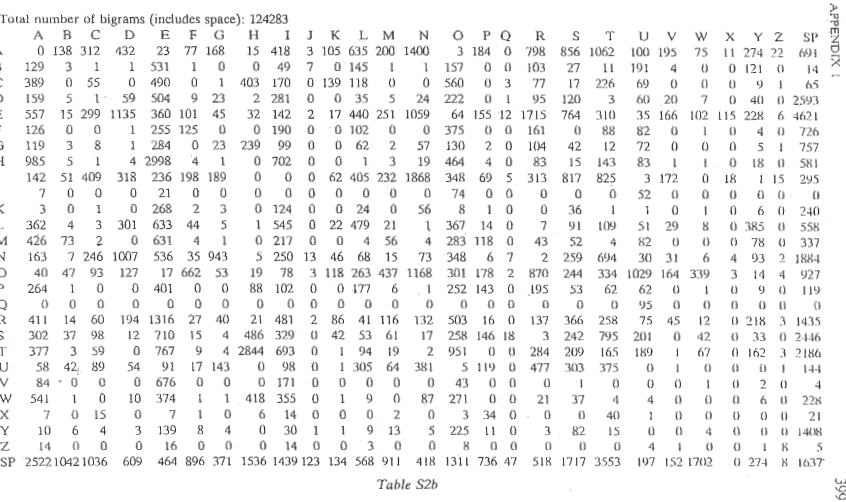

PAINSTAKINGLY transcribed by hand to a `.csv` file

In [6]:
# raw bigram counts transcribed and loaded from the `English-Stats.pdf` from canvas (hyperlink above)
alpha_M = np.loadtxt(fname = 'data/bigram_matrix.csv', delimiter = ',', dtype = np.int16)[:-1, :-1]
headings = " | ".join(f"{c:>3}" for c, _ in ALPHA_IMAP.items())
border = '-' * len(headings)

#### `Print English Bigram`

In [7]:
print(F'CHARACTER BIGRAMS {alpha_M.shape}')
print(F'==========================')
print(f'      {headings}\n------{border}')

headings = headings.replace(' |', '').split()
for i, r in enumerate(alpha_M):
    print(f'{headings[i]} || ' + " |".join(f"{num:4}" for num in r))

CHARACTER BIGRAMS (26, 26)
        A |   B |   C |   D |   E |   F |   G |   H |   I |   J |   K |   L |   M |   N |   O |   P |   Q |   R |   S |   T |   U |   V |   W |   X |   Y |   Z
---------------------------------------------------------------------------------------------------------------------------------------------------------------
A ||    0 | 138 | 312 | 432 |  23 |  77 | 168 |  15 | 418 |   3 | 105 | 635 | 200 |1400 |   3 | 184 |   0 | 798 | 856 |1062 | 100 | 195 |  75 |  11 | 274 |  22
B ||  129 |   3 |   1 |   1 | 531 |   1 |   0 |   0 |  48 |   7 |   0 | 145 |   1 |   1 | 157 |   0 |   0 | 103 |  27 |  11 | 191 |   4 |   0 |   0 | 121 |   0
C ||  389 |   0 |  55 |   0 | 490 |   0 |   1 | 403 | 170 |   0 | 139 | 118 |   0 |   0 | 560 |   0 |   3 |  77 |  17 | 226 |  69 |   0 |   0 |   0 |   9 |   1
D ||  159 |   5 |   1 |  59 | 504 |   9 |  23 |   2 | 281 |   0 |   0 |  35 |   5 |  24 | 222 |   0 |   1 |  95 | 120 |   3 |  60 |  20 |   7 |   0 |  40 |   0
E ||  557 |  

#### `Build Cipher Bigram Matrix`

In [8]:
cipher_M2, cipher_imap, _ = _ngram_to_M(s = cipher, n = 2)
headings = " | ".join(f"{c:>3}" for c, _ in cipher_imap.items())
border = '-' * len(headings)

#### `Print Bigram Matrix`

In [9]:
print(F'CIPHER BIGRAMS {cipher_M2.shape}')
print(F'=======================')
print(f'     {headings}\n-----{border}')

headings = headings.replace(' |', '').split()
for i, r in enumerate(cipher_M2):
    print(f'{headings[i]} || ' + " | ".join(f"{num:3}" for num in r))

CIPHER BIGRAMS (22, 22)
       A |   B |   C |   E |   F |   G |   I |   J |   K |   M |   O |   P |   Q |   R |   S |   T |   U |   V |   W |   X |   Y |   Z
--------------------------------------------------------------------------------------------------------------------------------------
A ||   0 |   0 |   0 |   0 |   0 |   0 |   0 |   0 |   0 |   0 |   1 |   0 |   0 |   0 |   3 |   0 |   0 |   0 |   0 |   0 |   0 |   0
B ||   0 |   0 |   0 |   0 |   1 |   5 |   0 |   1 |   1 |   0 |   4 |   1 |   0 |   0 |   0 |   5 |   4 |   0 |   0 |   1 |   2 |   0
C ||   0 |   2 |   0 |   2 |   0 |   1 |   0 |   1 |   1 |   0 |   0 |   3 |   0 |   0 |   0 |   1 |   0 |   4 |   0 |   0 |   0 |   1
E ||   0 |   0 |   0 |   0 |   1 |   0 |   1 |   1 |   5 |   0 |   0 |   0 |   0 |   5 |   2 |   1 |   0 |   0 |   0 |   0 |   3 |   0
F ||   0 |   1 |   0 |   0 |   0 |   0 |   0 |   0 |   2 |   0 |   0 |   0 |   0 |   0 |   0 |   0 |   0 |   0 |   0 |   1 |   0 |   0
G ||   0 |   1 |   2 |   3 |   

### `Trigram`

#### `Build Trigram Matrix`

In [10]:
cipher_M3, row_map, col_map = _ngram_to_M(s = cipher)

col_headings = " | ".join(f"{k:>3}" for k in col_map.keys())
border = '-' * len(col_headings)
row_headings = list(row_map.keys())

#### `Print Trigram Matrix`

In [11]:
print(F'CIPHER TRIGRAMS {cipher_M3.shape}')
print(F'=========================')
print(f'     {col_headings}\n-----{border}')

for i, row in enumerate(cipher_M3):
    print(f'{row_headings[i]} || ' + " | ".join(f"{num:3}" for num in row))

CIPHER TRIGRAMS (22, 150)
      AO |  AS |  BF |  BG |  BJ |  BK |  BO |  BP |  BT |  BU |  BX |  BY |  CB |  CE |  CG |  CJ |  CK |  CP |  CT |  CV |  CZ |  EF |  EI |  EJ |  EK |  ER |  ES |  ET |  EY |  FB |  FK |  FX |  GB |  GC |  GE |  GJ |  GK |  GM |  GO |  GP |  GQ |  GS |  GX |  GY |  IO |  IS |  IU |  JB |  JM |  JS |  JZ |  KB |  KE |  KG |  KK |  KP |  KS |  KV |  KY |  KZ |  MB |  MG |  MK |  MU |  OG |  OK |  OM |  OP |  OR |  OU |  OZ |  PB |  PE |  PG |  PT |  PV |  PZ |  QJ |  QS |  RB |  RQ |  RS |  RV |  RZ |  SB |  SC |  SE |  SF |  SG |  SI |  SJ |  SK |  SM |  SP |  SQ |  ST |  SU |  SV |  SW |  SX |  SY |  SZ |  TA |  TB |  TC |  TE |  TK |  TS |  TU |  TV |  TZ |  UB |  UC |  UE |  UF |  US |  UU |  UV |  UX |  UZ |  VE |  VI |  VJ |  VS |  VY |  VZ |  WS |  XB |  XJ |  XM |  XZ |  YB |  YE |  YK |  YO |  YS |  YV |  YY |  YZ |  ZA |  ZC |  ZJ |  ZK |  ZM |  ZP |  ZR |  ZT |  ZU |  ZW |  ZY
-----------------------------------------------------------------------

## `Raw Character Counts`

In [12]:
k_cipher = _topk(d = cipher, k = len(cipher_imap))
k2_cipher = _topk(d = _ngrams(s = cipher, n = 2), k = len(cipher_imap))
k3_cipher = _topk(d = _ngrams(s = cipher), k = len(cipher_imap))

# keys in respective order
# visualize and compare probabilities of the top `k`
print(f"  {'   -CIPHER-':<18}{'-CIPHER BIGRAMS-':<20}{'-CIPHER TRIGRAMS-':<21}")
print(f"  {'=' * 15} {'=' * 20} {'=' * 19}")

for i, (c, c2, c3) in enumerate(zip(k_cipher.keys(), k2_cipher.keys(), k3_cipher.keys())):
    print(f"     '{c}' : {k_cipher[c]:<6}|     '{c2}' : {k2_cipher[c2]:<6}  |     '{c3}' : {k3_cipher[c3]:<6}")

     -CIPHER-       -CIPHER BIGRAMS-    -CIPHER TRIGRAMS-    
  =============== ==================== ===================
     'S' : 46    |     'VS' : 14      |     'VSG' : 6     
     'K' : 28    |     'KB' : 8       |     'YVS' : 4     
     'V' : 28    |     'KV' : 8       |     'SKB' : 4     
     'B' : 25    |     'SG' : 7       |     'KVS' : 4     
     'G' : 20    |     'VZ' : 6       |     'CVS' : 3     
     'Z' : 20    |     'JS' : 6       |     'CPV' : 3     
     'E' : 19    |     'SK' : 6       |     'BUC' : 3     
     'Y' : 18    |     'BT' : 5       |     'XBO' : 3     
     'C' : 16    |     'BG' : 5       |     'PVE' : 3     
     'T' : 14    |     'EK' : 5       |     'ERV' : 3     
     'U' : 14    |     'ER' : 5       |     'VER' : 3     
     'J' : 10    |     'YV' : 5       |     'VZK' : 3     
     'P' : 10    |     'CV' : 4       |     'JSK' : 3     
     'O' : 9     |     'BO' : 4       |     'SGK' : 3     
     'R' : 7     |     'BU' : 4       |     'SWS' : 3

## `Character Frequencies`

In [13]:
# character frequencies in the `substitution` cipher
cipher_p = _frequency(s = cipher)
cipher_2p = _frequency(s = _ngrams(s = cipher, n = 2))
cipher_3p = _frequency(s = _ngrams(s = cipher))
alpha_p = dict(zip(ALPHABET, ALPHA_STATS))

k_alpha = _topk(d = alpha_p, k = len(alpha_p))
k_cipher = _topk(d = cipher_p, k = len(cipher_p))
k2_cipher = _topk(d = cipher_2p, k = len(cipher_p))
k3_cipher = _topk(d = cipher_3p, k = len(cipher_p))

In [14]:
# keys in respective order
# visualize and compare probabilities of the top `k`
print(f"{'   -CIPHER-':<17}{'-CIPHER BIGRAMS-':<21}{'-CIPHER TRIGRAMS-':<21}{'-ENGLISH-':>10}")
print(f"{'=' * 15} {'=' * 19} {'=' * 20} {'=' * 15}")

for i, (c, c2, c3, eng) in enumerate(zip(k_cipher.keys(), k2_cipher.keys(), k3_cipher.keys(), k_alpha.keys())):
    print(f" '{c}' : {k_cipher[c]:<6}  |   '{c2}' : {k2_cipher[c2]:<6}   |   '{c3}' : {k3_cipher[c3]:<6}   |  '{eng}': {k_alpha[eng]:<6}")

   -CIPHER-      -CIPHER BIGRAMS-     -CIPHER TRIGRAMS-     -ENGLISH-
=============== =================== ==================== ===============
 'S' : 0.146   |   'VS' : 0.0447   |   'VSG' : 0.0192   |  'E': 0.1026
 'K' : 0.0889  |   'KB' : 0.0256   |   'YVS' : 0.0128   |  'T': 0.0731
 'V' : 0.0889  |   'KV' : 0.0256   |   'SKB' : 0.0128   |  'A': 0.0659
 'B' : 0.0794  |   'SG' : 0.0224   |   'KVS' : 0.0128   |  'O': 0.0606
 'G' : 0.0635  |   'VZ' : 0.0192   |   'CVS' : 0.0096   |  'I': 0.0562
 'Z' : 0.0635  |   'JS' : 0.0192   |   'CPV' : 0.0096   |  'N': 0.0545
 'E' : 0.0603  |   'SK' : 0.0192   |   'BUC' : 0.0096   |  'S': 0.0511
 'Y' : 0.0571  |   'BT' : 0.016    |   'XBO' : 0.0096   |  'H': 0.0492
 'C' : 0.0508  |   'BG' : 0.016    |   'PVE' : 0.0096   |  'R': 0.0483
 'T' : 0.0444  |   'EK' : 0.016    |   'ERV' : 0.0096   |  'D': 0.0343
 'U' : 0.0444  |   'ER' : 0.016    |   'VER' : 0.0096   |  'L': 0.0325
 'J' : 0.0317  |   'YV' : 0.016    |   'VZK' : 0.0096   |  'C': 0.0225
 'P' 

## `Plaintext Canvas`

In [15]:
raw_canvas = '-' * len(cipher)  # string of dashes matching cipher length
cipher_list = [cipher[i : i + 63] for i in range(0, len(cipher), 63)]
canvas_ = _canvas(t =  '', r = '', canvas = raw_canvas, cipher = cipher, width = 63)

for i in range(len(canvas_)):  
    print(canvas_[i])
    print(cipher_list[i])
    print()

---------------------------------------------------------------
CBXBOPEYVJSKBTZJSXBOGQSXJZCZJSEFXBOMUSZYSEKVSTKBUCVSGKVSPBGCPVE

---------------------------------------------------------------
RVISUBTASCKBTBUZTAOZASZTCEYZPVSGYOGMGEYSYVSKBUCJSKVZKEKPZYEJMBY

---------------------------------------------------------------
YEIUSFBGYVSISUESWSCVSGYSUFKVSBTUXMBYYSYYBGBFKVZKPBGCPVERVYVSQSM

---------------------------------------------------------------
KETVSGJSJBGXZTCPVERVYVSVZCTSWSGPGEKKSTCBPTERBOUCVZWSKBUCVSGKVSK

---------------------------------------------------------------
GOKVIOKBTZRZMGERSEKYKGORQJSKBKSUUVSGKVZKZASTESVZCGSWSZUSCEKKBJS



In [16]:
canvas2 = _canvas(t =  'W', r = 'V', canvas = canvas_, cipher = cipher, width = 63)

# KVS -> THE
canvas2 = _canvas(t =  'K', r = 'T', canvas = canvas2, cipher = cipher, width = 63)
canvas2 = _canvas(t =  'V', r = 'H', canvas = canvas2, cipher = cipher, width = 63)
canvas2 = _canvas(t =  'S', r = 'E', canvas = canvas2, cipher = cipher, width = 63)
# VSG -> HER
canvas2 = _canvas(t =  'V', r = 'H', canvas = canvas2, cipher = cipher, width = 63)
canvas2 = _canvas(t =  'S', r = 'E', canvas = canvas2, cipher = cipher, width = 63)
canvas2 = _canvas(t =  'G', r = 'R', canvas = canvas2, cipher = cipher, width = 63)
# YVS -> SHE
canvas2 = _canvas(t =  'Y', r = 'S', canvas = canvas2, cipher = cipher, width = 63)
canvas2 = _canvas(t =  'V', r = 'H', canvas = canvas2, cipher = cipher, width = 63)
canvas2 = _canvas(t =  'S', r = 'E', canvas = canvas2, cipher = cipher, width = 63)
#==================
# I hit a stride here where the letters began to fall into place
canvas2 = _canvas(t =  'B', r = 'O', canvas = canvas2, cipher = cipher, width = 63)
canvas2 = _canvas(t =  'Z', r = 'A', canvas = canvas2, cipher = cipher, width = 63)
canvas2 = _canvas(t =  'M', r = 'P', canvas = canvas2, cipher = cipher, width = 63)
canvas2 = _canvas(t =  'U', r = 'L', canvas = canvas2, cipher = cipher, width = 63)
canvas2 = _canvas(t =  'F', r = 'F', canvas = canvas2, cipher = cipher, width = 63)
canvas2 = _canvas(t =  'T', r = 'N', canvas = canvas2, cipher = cipher, width = 63)
canvas2 = _canvas(t =  'X', r = 'Y', canvas = canvas2, cipher = cipher, width = 63)
canvas2 = _canvas(t =  'I', r = 'B', canvas = canvas2, cipher = cipher, width = 63)
canvas2 = _canvas(t =  'E', r = 'I', canvas = canvas2, cipher = cipher, width = 63)
canvas2 = _canvas(t =  'C', r = 'D', canvas = canvas2, cipher = cipher, width = 63)
canvas2 = _canvas(t =  'O', r = 'U', canvas = canvas2, cipher = cipher, width = 63)
canvas2 = _canvas(t =  'P', r = 'W', canvas = canvas2, cipher = cipher, width = 63)
canvas2 = _canvas(t =  'J', r = 'M', canvas = canvas2, cipher = cipher, width = 63)
canvas2 = _canvas(t =  'Q', r = 'K', canvas = canvas2, cipher = cipher, width = 63)
canvas2 = _canvas(t =  'R', r = 'C', canvas = canvas2, cipher = cipher, width = 63)
canvas2 = _canvas(t =  'A', r = 'G', canvas = canvas2, cipher = cipher, width = 63)

for i in range(len(canvas2)):  
    print(canvas2[i])
    print(cipher_list[i])
    print()

DOYOUWISHMETONAMEYOURKEYMADAMEIFYOUPLEASEITHENTOLDHERTHEWORDWHI
CBXBOPEYVJSKBTZJSXBOGQSXJZCZJSEFXBOMUSZYSEKVSTKBUCVSGKVSPBGCPVE

CHBELONGEDTONOLANGUAGEANDISAWHERSURPRISESHETOLDMETHATITWASIMPOS
RVISUBTASCKBTBUZTAOZASZTCEYZPVSGYOGMGEYSYVSKBUCJSKVZKEKPZYEJMBY

SIBLEFORSHEBELIEVEDHERSELFTHEONLYPOSSESSOROFTHATWORDWHICHSHEKEP
YEIUSFBGYVSISUESWSCVSGYSUFKVSBTUXMBYYSYYBGBFKVZKPBGCPVERVYVSQSM

TINHERMEMORYANDWHICHSHEHADNEVERWRITTENDOWNICOULDHAVETOLDHERTHET
KETVSGJSJBGXZTCPVERVYVSVZCTSWSGPGEKKSTCBPTERBOUCVZWSKBUCVSGKVSK

RUTHBUTONACAPRICEITSTRUCKMETOTELLHERTHATAGENIEHADREVEALEDITTOME
GOKVIOKBTZRZMGERSEKYKGORQJSKBKSUUVSGKVZKZASTESVZCGSWSZUSCEKKBJS



#### __[Excerpt from Giacomo Casanova](https://assets.cambridge.org/97811070/17887/frontmatter/9781107017887_frontmatter.pdf?)__

<font color = gold>

"Do you wish me to name your key, madame?" 

"If you please."

I then told her the word which belonged to no language, and I saw her surprise.

She told me that it was impossible, for she believed herself the only possessor of that word, which she kept in her memory and which she had never written down.

I could have told her the truth, but on a caprice it struck me to tell her that a genie had revealed it to me.